In [31]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import pandas as pd  
import numpy as np
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
X = df.iloc[0:150, [0, 2]].values
y = df.iloc[0:150, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_combined = np.array([*X_train[:, ], *X_test[:, ]])
y_combined = np.array([*y_train[:, ], *y_test[:, ]])
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = sc.transform(X_combined)

In [32]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[0:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
    Z = Z.reshape(xx1.shape)
    Z = np.where(Z == 'Iris-setosa', 0, Z)
    Z = np.where(Z == 'Iris-versicolor', 1, Z)
    Z = np.where(Z == 'Iris-virginica', 2, Z)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)): 
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1, c=colors[idx], marker=markers[idx], label=cl, linewidths=0.5, edgecolor='black')  
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolors='black', alpha=0.8, linewidths=1, marker='o', s=100, label='test set')

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


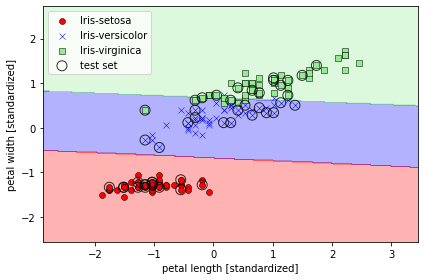

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


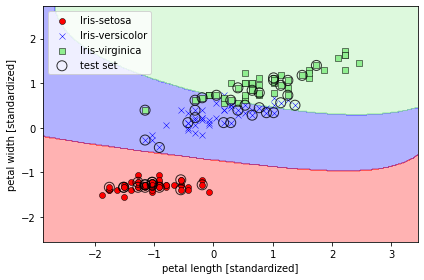

In [34]:
from sklearn.svm import SVC
svm1 = SVC(kernel='rbf', gamma=0.2, C=1.0, random_state=1)
svm1.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm1, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.


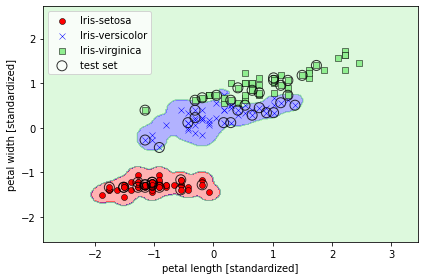

In [35]:
from sklearn.svm import SVC
svm2 = SVC(kernel='rbf', gamma=50, C=1.0, random_state=1)
svm2.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm2, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()